In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud

# load the dataset
df = pd.read_csv('../data/LGBT_Tweets_processed.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/LGBT_Tweets_processed.csv'

#  <font color=blue>Checking Data</font>

In [2]:
df.shape

(32456, 9)

In [3]:
df.dtypes

Unnamed: 0         int64
date              object
time              object
id                 int64
tweet             object
language          object
replies_count      int64
retweets_count     int64
likes_count        int64
dtype: object

In [5]:
df.head(15)

,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count
0,0,2022-08-26,10:31:10,1562991009180827649,Praying for my lgbt Nigerians 🙏🏽🙏🏽🙏🏽,en,0,0,0
1,1,2022-08-26,10:31:02,1562990976939229184,@yanmisamm So pass agg omg you really are lgbt,en,0,0,0
2,3,2022-08-26,10:30:59,1562990965442326528,@ChampionExcel @watokohom @MrAndyNgo @football...,en,0,0,0
3,7,2022-08-26,10:30:34,1562990860928659457,To be clear it doesn't justify what the LGBT c...,en,0,0,0
4,10,2022-08-26,10:30:24,1562990819485032449,good night lgbt community https://t.co/0PAMOU...,en,1,0,2
5,12,2022-08-26,10:30:21,1562990805999964161,Hello guys Im Japanese Filipino who does singi...,en,0,0,0
6,13,2022-08-26,10:30:17,1562990786483957766,@SmokeySmoker @Nope_Im_Outski @FOX5Vegas BLM a...,en,0,0,0
7,15,2022-08-26,10:30:12,1562990768653971456,"it's not illegal to be gay in Russia, it's ill...",en,0,0,0
8,16,2022-08-26,10:30:09,1562990752577503233,About 120 asylum-seekers who are members of th...,en,0,0,0
9,18,2022-08-26,10:29:57,1562990702170034176,@URaBold1 v true &amp; it makes it extra insid...,en,0,0,0


In [33]:
df.head(-1)

,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count,sentiment,sentiment_label
0,0,2022-08-26,10:31:10,1562991009180827649,praying for my lgbt nigerians 🙏🏽🙏🏽🙏🏽,en,0,0,0,0.000000,Neutral
1,1,2022-08-26,10:31:02,1562990976939229184,so pass agg omg you really are lgbt,en,0,0,0,0.200000,positive
2,3,2022-08-26,10:30:59,1562990965442326528,"many working in the media, twitter and fb see...",en,0,0,0,0.235119,positive
3,7,2022-08-26,10:30:34,1562990860928659457,to be clear it doesn't justify what the lgbt c...,en,0,0,0,0.050000,positive
4,10,2022-08-26,10:30:24,1562990819485032449,good night lgbt community,en,1,0,2,0.700000,positive
...,...,...,...,...,...,...,...,...,...,...,...
32450,99988,2022-08-21,00:09:41,1561022669155450880,its okay to bully lgbt ppl if they are pedophi...,en,0,0,1,0.250000,positive
32451,99995,2022-08-21,00:09:11,1561022541833068545,pedoslgbt+ community,en,0,1,1,0.000000,Neutral
32452,99997,2022-08-21,00:09:06,1561022522933616642,i`m anti-trans and anti-lgbt,en,1,0,1,0.000000,Neutral
32453,100009,2022-08-21,00:07:52,1561022211405881344,poor taste… yet if it impacts those with ...,en,0,0,0,-0.400000,negative


In [8]:
df['language'].unique()

array(['en'], dtype=object)

In [9]:
df.isnull().sum()


Unnamed: 0        0
date              0
time              0
id                0
tweet             0
language          0
replies_count     0
retweets_count    0
likes_count       0
dtype: int64

In [10]:
df.count()

Unnamed: 0        32456
date              32456
time              32456
id                32456
tweet             32456
language          32456
replies_count     32456
retweets_count    32456
likes_count       32456
dtype: int64

# <font color=blue>Exploring Data </font>

In [12]:
hashtag = df.tweet.str.extractall(r'(\#\w+)')[0].value_counts()
hashtag

0
#LGBT               3827
#lgbt               1299
#SFFpit             1096
#FA                  637
#A                   618
                    ... 
#harryshumjr           1
#matthewdaddario       1
#malec                 1
#Shadowhunters         1
#grr                   1
Name: count, Length: 7225, dtype: int64

In [13]:
# Tweet with highest likes
df[df['likes_count'] == df['likes_count'].max()]['tweet']

10023    lgbt fashion spectrum  https://t.co/1vmtlBBKnH
Name: tweet, dtype: object

In [14]:
# tweet with highest retweet
df[df['retweets_count'] == df['retweets_count'].max()]['tweet']

10023    lgbt fashion spectrum  https://t.co/1vmtlBBKnH
Name: tweet, dtype: object

In [15]:
# tweet with highest reply
df[df['replies_count'] == df['replies_count'].max()]['tweet']

21221    Would you vote for an LGBT candidate for Presi...
Name: tweet, dtype: object

In [32]:
hashtag.head(10)

0
#LGBT      3827
#lgbt      1299
#SFFpit    1096
#FA         637
#A          618
#YA         484
#LGBTQ      477
#gay        290
#SFFPit     285
#pride      245
Name: count, dtype: int64

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag.to_dict())

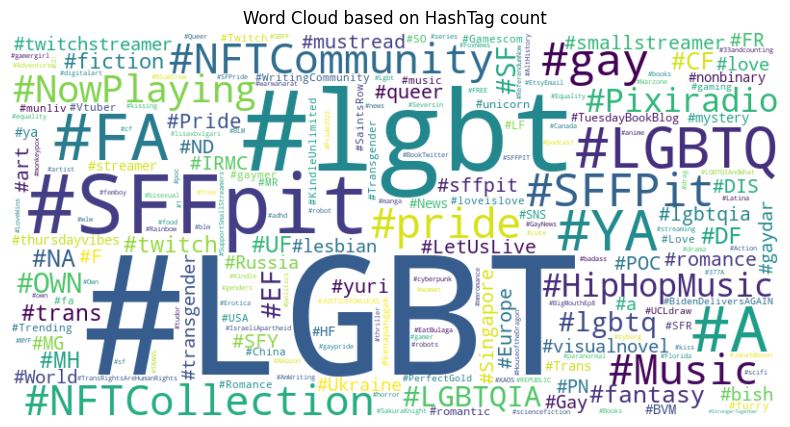

In [14]:
# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on HashTag count')
plt.show()

In [16]:
#Perform sentiment analysis using TextBlob on data without preprocessing
df['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [17]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'Neutral'))

In [18]:
# Display basic information about the dataset
print("Dataset Dimensions:", df.shape)
print("\nColumns and Data Types:")
print(df.dtypes)

Dataset Dimensions: (32456, 11)

Columns and Data Types:
Unnamed: 0           int64
date                object
time                object
id                   int64
tweet               object
language            object
replies_count        int64
retweets_count       int64
likes_count          int64
sentiment          float64
sentiment_label     object
dtype: object


In [35]:
# Display the first few rows of the dataset with sentiment labels
print("\nFirst 5 Rows:")
print(df[['tweet', 'sentiment', 'sentiment_label']].head())


First 5 Rows:
                                               tweet  sentiment  \
0               praying for my lgbt nigerians 🙏🏽🙏🏽🙏🏽   0.000000   
1                so pass agg omg you really are lgbt   0.200000   
2   many working in the media, twitter and fb see...   0.235119   
3  to be clear it doesn't justify what the lgbt c...   0.050000   
4                         good night lgbt community    0.700000   

  sentiment_label  
0         Neutral  
1        positive  
2        positive  
3        positive  
4        positive  


In [21]:
df['sentiment_label'].value_counts()

sentiment_label
positive    15981
Neutral      8547
negative     7928
Name: count, dtype: int64

# <font color=blue>Sentiment Analysis With Data Processing</font>

In [23]:
# all lowercase
df.tweet = df.tweet.str.lower()

#Remove twitter handlers
df.tweet = df.tweet.apply(lambda x:re.sub('@[^\s]+','',x))

# remove url
df.tweet = df.tweet.apply(lambda x:re.sub(r"http\S+", "", x))

# Substituting multiple spaces to single space
df.tweet = df.tweet.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#remove hashtags
df.tweet = df.tweet.apply(lambda x:re.sub(r'\B#\S+','',x))

#remove all single characters
df.tweet = df.tweet.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [24]:
df.head()

,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count,sentiment,sentiment_label
0,0,2022-08-26,10:31:10,1562991009180827649,praying for my lgbt nigerians 🙏🏽🙏🏽🙏🏽,en,0,0,0,0.000000,Neutral
1,1,2022-08-26,10:31:02,1562990976939229184,so pass agg omg you really are lgbt,en,0,0,0,0.200000,positive
2,3,2022-08-26,10:30:59,1562990965442326528,"many working in the media, twitter and fb see...",en,0,0,0,0.235119,positive
3,7,2022-08-26,10:30:34,1562990860928659457,to be clear it doesn't justify what the lgbt c...,en,0,0,0,0.050000,positive
4,10,2022-08-26,10:30:24,1562990819485032449,good night lgbt community,en,1,0,2,0.700000,positive


In [25]:
df['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [26]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'Neutral'))

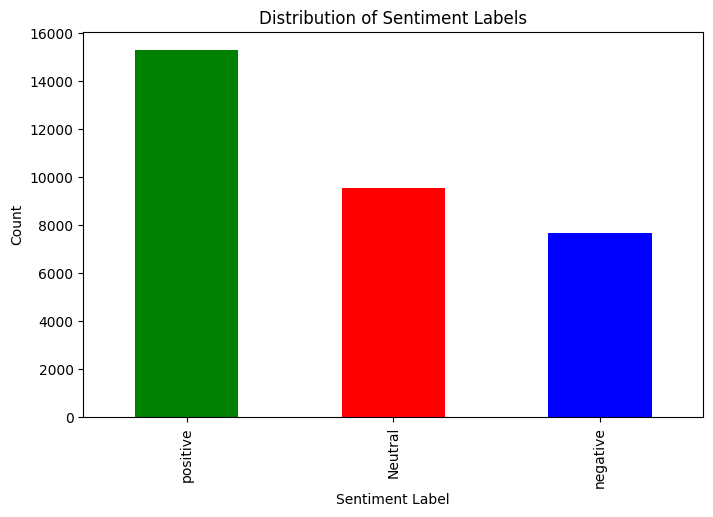

In [27]:
# Visualize the distribution of sentiment labels
plt.figure(figsize=(8, 5))
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [28]:
df['sentiment_label'].value_counts()

sentiment_label
positive    15272
Neutral      9541
negative     7643
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x12cc76a10>,
 [Text(0.10164491157174184, 1.0952937103588118, 'positive'),
  Text(-0.8134623939641079, -0.7404585968210394, 'Neutral'),
  Text(0.8124581079947032, -0.7415603972392723, 'negative')],
 [Text(0.05544267903913191, 0.5974329329229883, '47.1%\n15272'),
  Text(-0.4437067603440588, -0.4038865073569306, '29.4%\n9541'),
  Text(0.4431589679971108, -0.40448748940323936, '23.5%\n7643')])

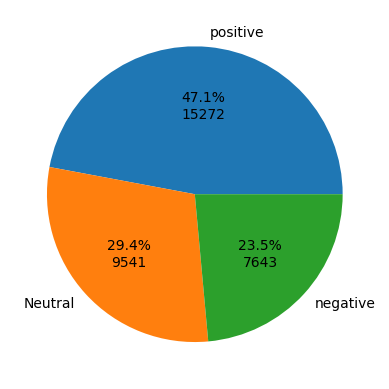

In [34]:
total = df['sentiment_label'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['sentiment_label'].value_counts().values, labels=df['sentiment_label'].value_counts().index, autopct=fmt)

# <font color=blue>Summary</font>

1: After checking the data, I see that the data has been cleaned before. There is not much data cleaning and processing I need to do.

2: I checked the tweet with the highest likes, the tweet with the highest retweets, and the tweet with the highest reply.
    - both the tweet with the highest likes and the tweet with the highest retweets are about fashion
    - while the tweet with the highest reply is about fashion 

3: I then make a count for hashtags and plot the word count for it.
- since the data is scraped on the hashtag #lgbt, it makes sense that the hashtag has the highest count, followed by #sffpit #fa #a #ya #gay #pride
- I did a little bit of searching on the internet to learn that #sffpit is a hashtag used for a twice-annual Twitter pitching contest. The last #SFFpit was August 25th, 2022. The data is being scaped with dates ranging between 08-21-2022 to 08-22-2022. Therefore a lot of hashtags for #SFFpit have been scaped into this dataset. For example #fa: fantasy, #a: adult, #ya: young adult
- It's nice to see #gay and #pride hashtags in the top ten (even though June is the official Pride month)

4: I did sentiment analysis using TextBlob with data that has been preprocessed and without preprocessed:
- For comparison, the labels are different for 2 processes.
- The result shows that 47.1% of the tweets are positive, 29.4% are neutral and 23.5% are negative.
- A potential biases in here is that the data is in a short date range with the novel pitching event happening.
        